# Support Vector Regression (SVR)

## Importing the libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [74]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 4, 12)
X_train = training_set.iloc[:, [3,4]].values
y_train = training_set.iloc[:, [1,2]].values
test_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 1, 3)
X_test = test_set.iloc[:, [3,4]].values
y_test = test_set.iloc[:, [1,2]].values

In [76]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [78]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (26589, 2) instead.

## Predicting the Test set results

In [65]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[18.19 19.77]
 [18.19 19.77]
 [18.19 19.77]
 ...
 [18.38 18.77]
 [18.38 18.85]
 [18.38 18.92]]


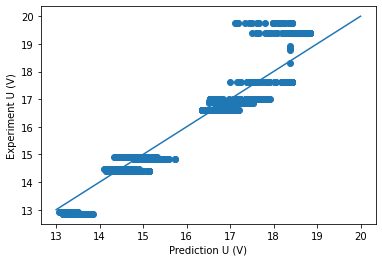

In [66]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

## Evaluating the Model Performance

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.89311469508746

In [68]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.6401475834768918


In [69]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

47.3056052376556


In [70]:
np.savetxt("svr_u_test_train2test1_originalH2.txt", y_test)

In [71]:
np.savetxt("svr_u_pred_train2test1_originalH2.txt", y_pred)